# Feature Detection and Matching


### Feature Detection

In [2]:
# importing libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# for resizing our inline images
import pylab
pylab.rcParams['figure.figsize'] = (7, 10)

# read in the query and training image
query_img = cv2.imread('./img/query/magazine.jpg', 0)
train_img = cv2.imread('./img/training/garden_gun.jpg', 0)

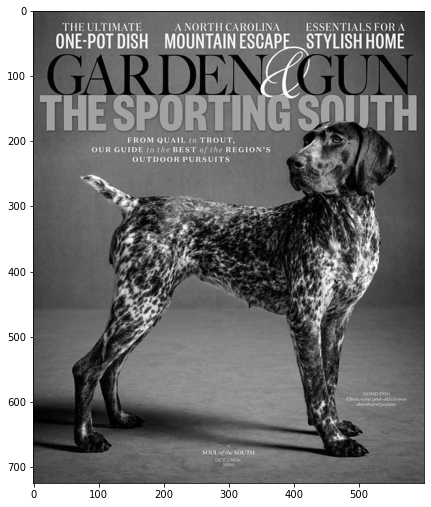

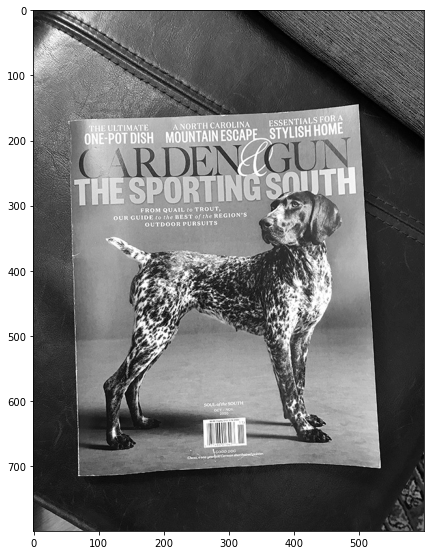

In [3]:
# displaying the images
plt.imshow(query_img, cmap='gray')
plt.show()

plt.imshow(train_img, cmap='gray')
plt.show()

In [4]:
# initialize detector (nfeatures = x will retain x features)
orb = cv2.ORB_create(nfeatures = 1000)
 
# find keypoints and descriptors
kp1, des1 = orb.detectAndCompute(query_img, None)
kp2, des2 = orb.detectAndCompute(train_img, None)

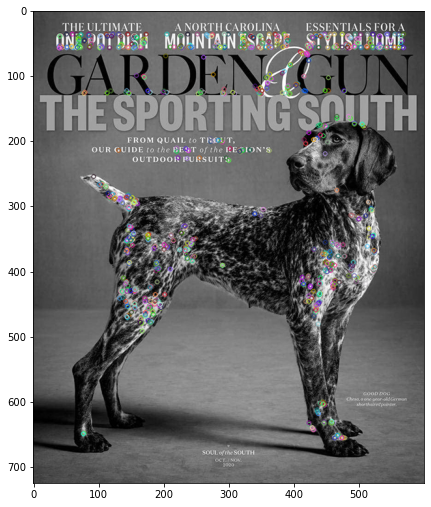

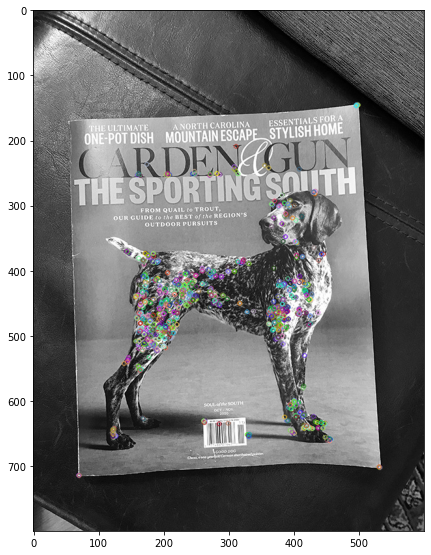

In [7]:
# draw our keypoints on the images
query_kp1 = cv2.drawKeypoints(query_img,kp1, None)
train_kp2 = cv2.drawKeypoints(train_img,kp2, None)

# look at the keypoints
plt.imshow(query_kp1)
plt.show()

plt.imshow(train_kp2)
plt.show()

In [13]:
# look at our descriptors
print(des1.shape) # outputs: (number of features, values that describe it)
print(des1[0]) # print first descriptor

(1000, 32)
[ 17 185 155 178 169 205  23 228 191 241 162  25 190 244  74  38 135 123
 124  87  95 105 186  35 169 212  29 122 192  95 131 126]


### Feature Matching

To find points of similarity, each keypoint of the first image is matched with a number of keypoints from the second image. This is achieved using the k-nearest neighbour algorithm by passing the descriptors of both images to the __knnMatch()__ function.
By setting k = 2, we keep the two best matches (in image 2) for each keypoint (in image 1).

In [42]:
# initialize matcher
bf = cv2.BFMatcher()
# use the k-nearest neighbour algorithm to match keypoints
matches = bf.knnMatch(des1, des2, k=2)

The __knnMatch()__ function yields a nested list of DMatch objects. A DMatch object has various different attributes, one of them being __.distance__, it is a measure of similarity between the two descriptors.

In [43]:
print(matches[0])

[<DMatch 0x7fb73af69450>, <DMatch 0x7fb73af69670>]


In [58]:
print(matches[0][0].distance)
print(matches[0][1].distance)

259.72869873046875
278.7992248535156


By applying a ratio test, we check that the two distances are sufficiently different. If they are not, then the keypoint is eliminated and will not be used for further calculations.

In [63]:
# initialize empty list
good_matches = []

# check for ambigous matches
# populate list with those that are not
for m, n in matches:
    if m.distance < n.distance * 0.75:
        good_matches.append([m])
        
# how many good matches were we able to find?
len(good_matches)

54

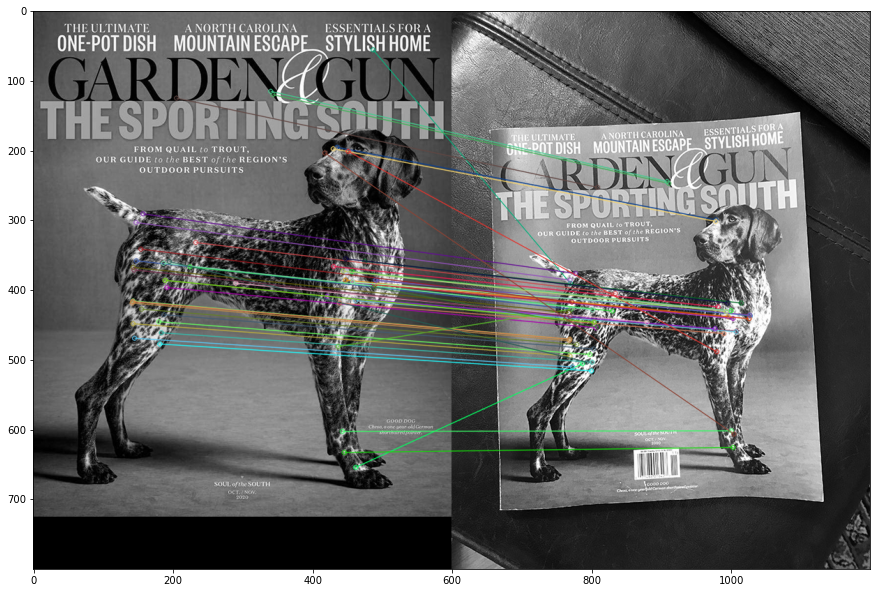

In [77]:
# draw the matches on the images
img_matched = cv2.drawMatchesKnn(query_img, kp1, train_img, kp2, good_matches, None, flags=2)

pylab.rcParams['figure.figsize'] = (15, 20)
plt.imshow(img_matched)
plt.show()